In [509]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [364]:
#importing dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df.head(15)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


In [365]:
#displating max_rows
pd.set_option('display.max_rows', 15)

In [366]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [367]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Our target variable in Nominal in nature so this is a classification problem

In [368]:
#lets rename the columns according to the given columns nmaes
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [369]:
df['Type of glass'].nunique()

6

lets divide the dataset into window glass (classes 1-4) and non-window glass (classes 5-7). 

# Converting multiclassification into binary classification problem

In [370]:
def fun(num):
    if num>=5:
        return 1
    else:
        return 0
df['Type of glass']=df['Type of glass'].apply(fun)

In [371]:
df['Type of glass'].nunique()

2

In [372]:
df.tail(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
203,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,1
204,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,1
205,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,1
206,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,1
207,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,1
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,1
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,1
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,1
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,1
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,1


In [373]:
df['Type of glass'].value_counts(normalize=True)*100

0    76.056338
1    23.943662
Name: Type of glass, dtype: float64

we are able to observe imbalance in the dataset

 window glass is only 23.94% and  non-window glass is 76% here

we will go with oversampling since there wont be any dataloss through it

In [374]:
df.shape

(213, 11)

In [375]:
df.drop_duplicates(inplace=True)
df.shape

(213, 11)

there are no duplicates in the dataset

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 20.0 KB


there are no null values or empty spaces in the dataset

In [377]:
df['Id number']

0        2
1        3
2        4
3        5
4        6
      ... 
208    210
209    211
210    212
211    213
212    214
Name: Id number, Length: 213, dtype: int64

it contains unique numbers so it wont have any relationshp in the model,so lets drop the column

In [378]:
df.drop('Id number',axis=1,inplace=True)

In [379]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

# 

# Missing values

In [380]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

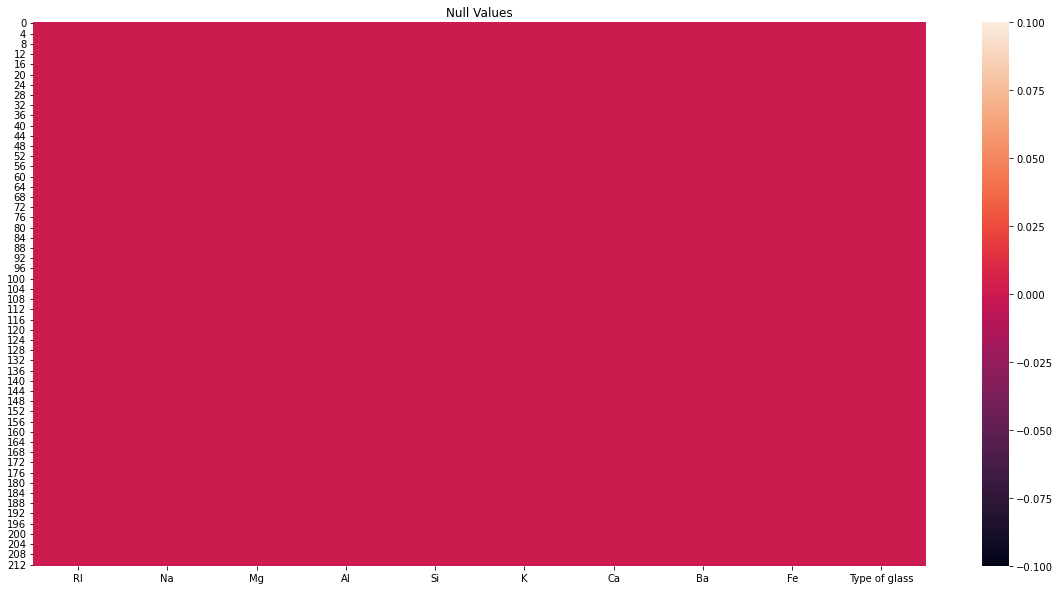

In [381]:
#heatmap on null values
plt.figure(figsize=[20,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

we can observe there are no null values

# Statistics summary

In [382]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,213.0,1.518353,0.003039,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.406761,0.818371,10.73000,12.90000,13.30000,13.83000,17.38000
Mg,213.0,2.676056,1.440453,0.00000,2.09000,3.48000,3.60000,3.98000
Al,213.0,1.446526,0.499882,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655023,0.774052,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.499108,0.653035,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.957934,1.426435,5.43000,8.24000,8.60000,9.18000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000
Type of glass,213.0,0.239437,0.427745,0.00000,0.00000,0.00000,0.00000,1.00000


In [383]:
 df["Type of glass"].value_counts()

0    162
1     51
Name: Type of glass, dtype: int64

Text(0.5, 1.0, 'Types of glass distributed')

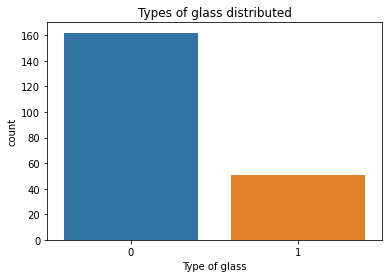

In [384]:
sns.countplot(df["Type of glass"])
plt.title("Types of glass distributed")

# Data Visualization

In [385]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [386]:
columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

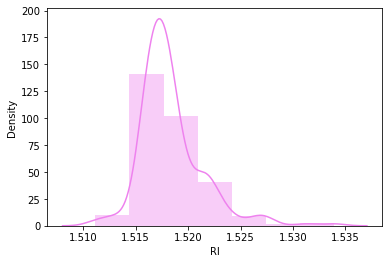

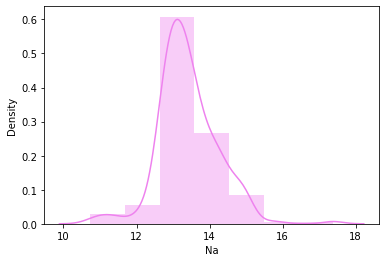

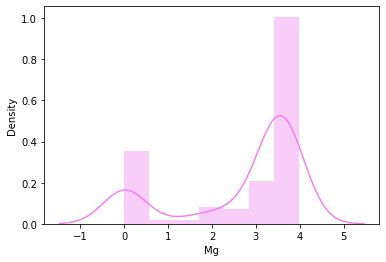

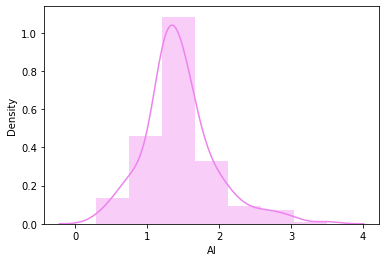

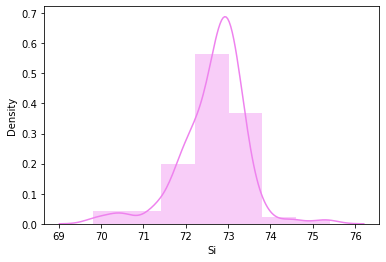

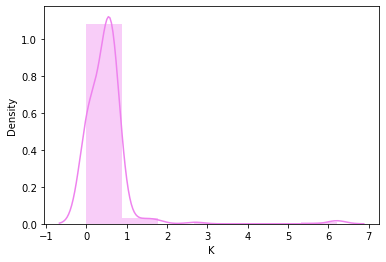

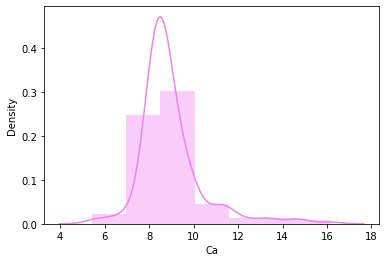

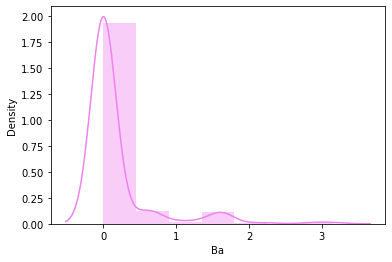

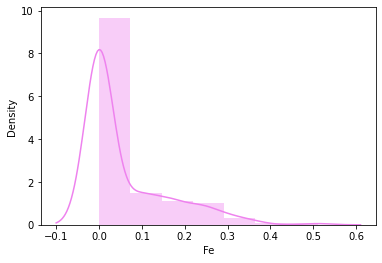

In [387]:
def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='violet',bins=7)
    
for i in range(0,9):
    dtp(i)

In [388]:
collist=df.columns.values
ncol=9
nrows=9

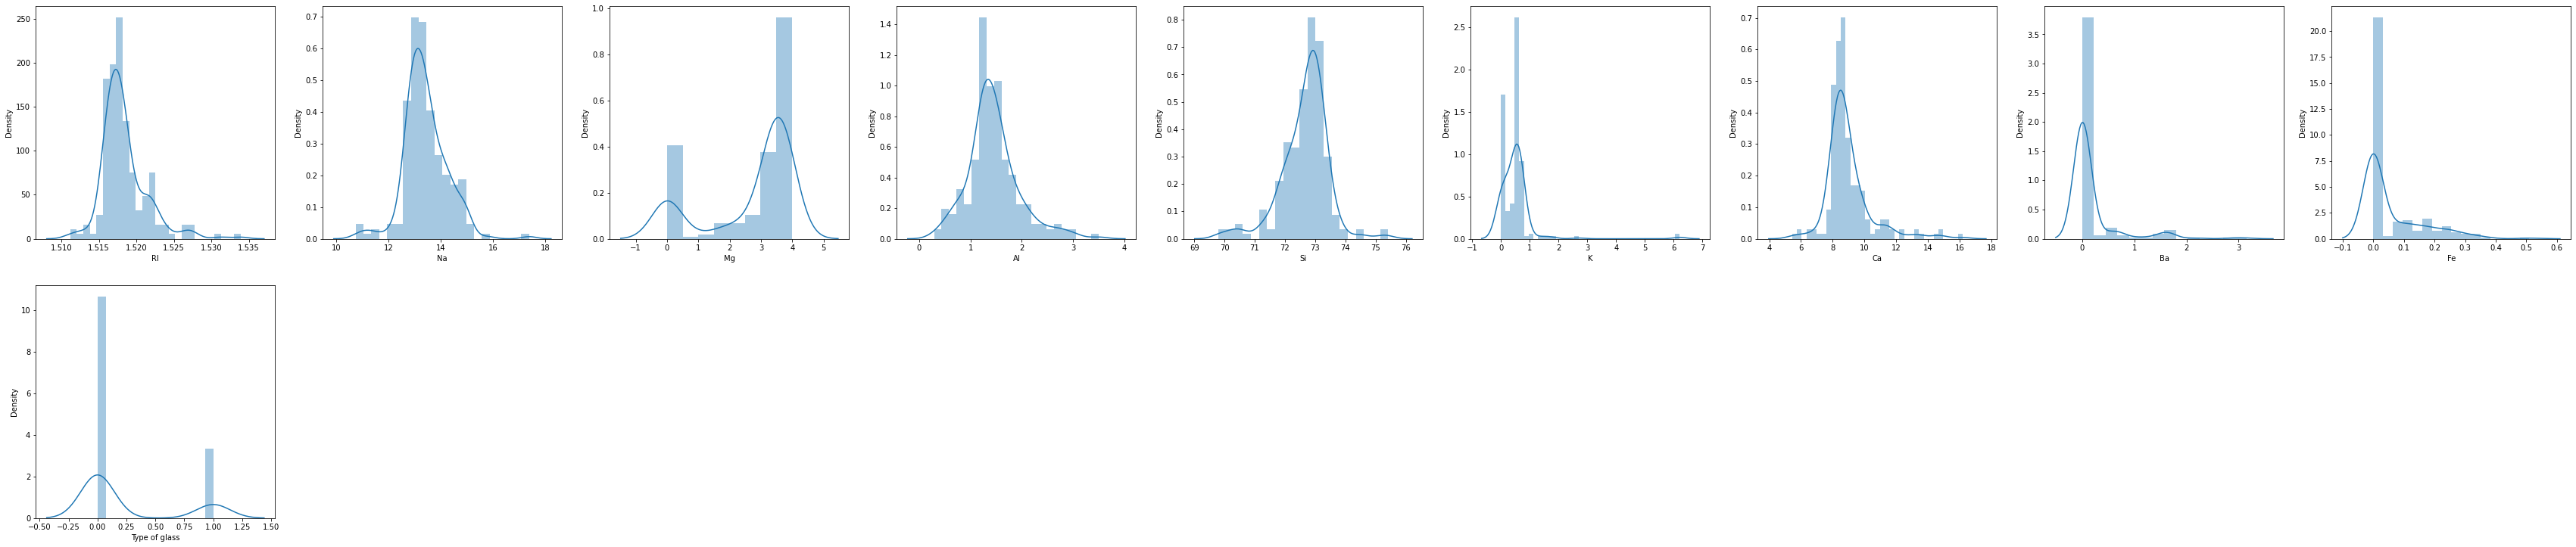

In [389]:
plt.figure(figsize=(60,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

# Checking distribution relationship

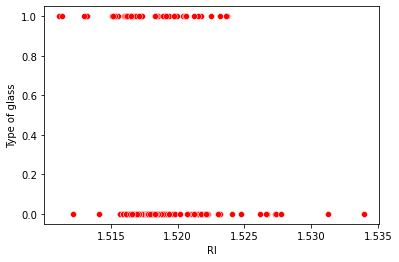

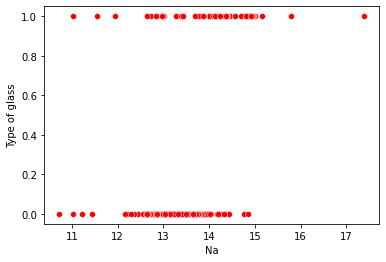

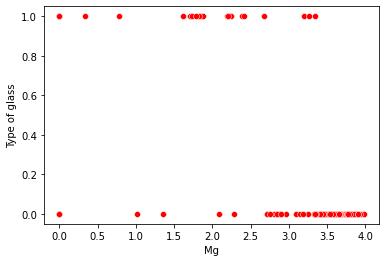

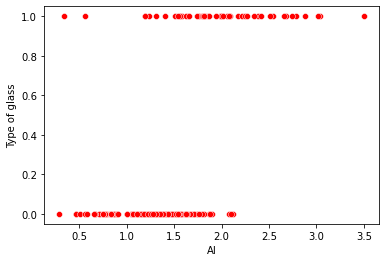

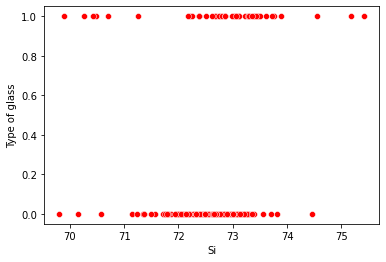

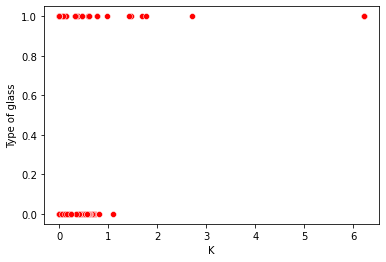

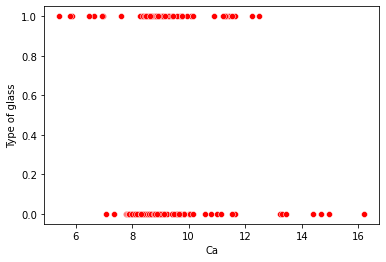

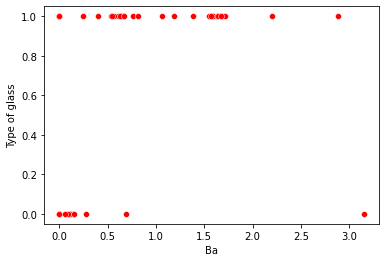

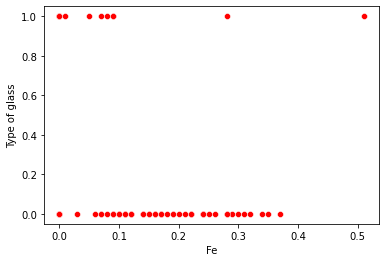

In [390]:
#relationship for each feature name with the output
def dtp(a):
    plt.figure()
    sns.scatterplot(x=df[columns[a]],y=df['Type of glass'],color='red')
    
for i in range(0,9):
    dtp(i)

# multivariate Analysis

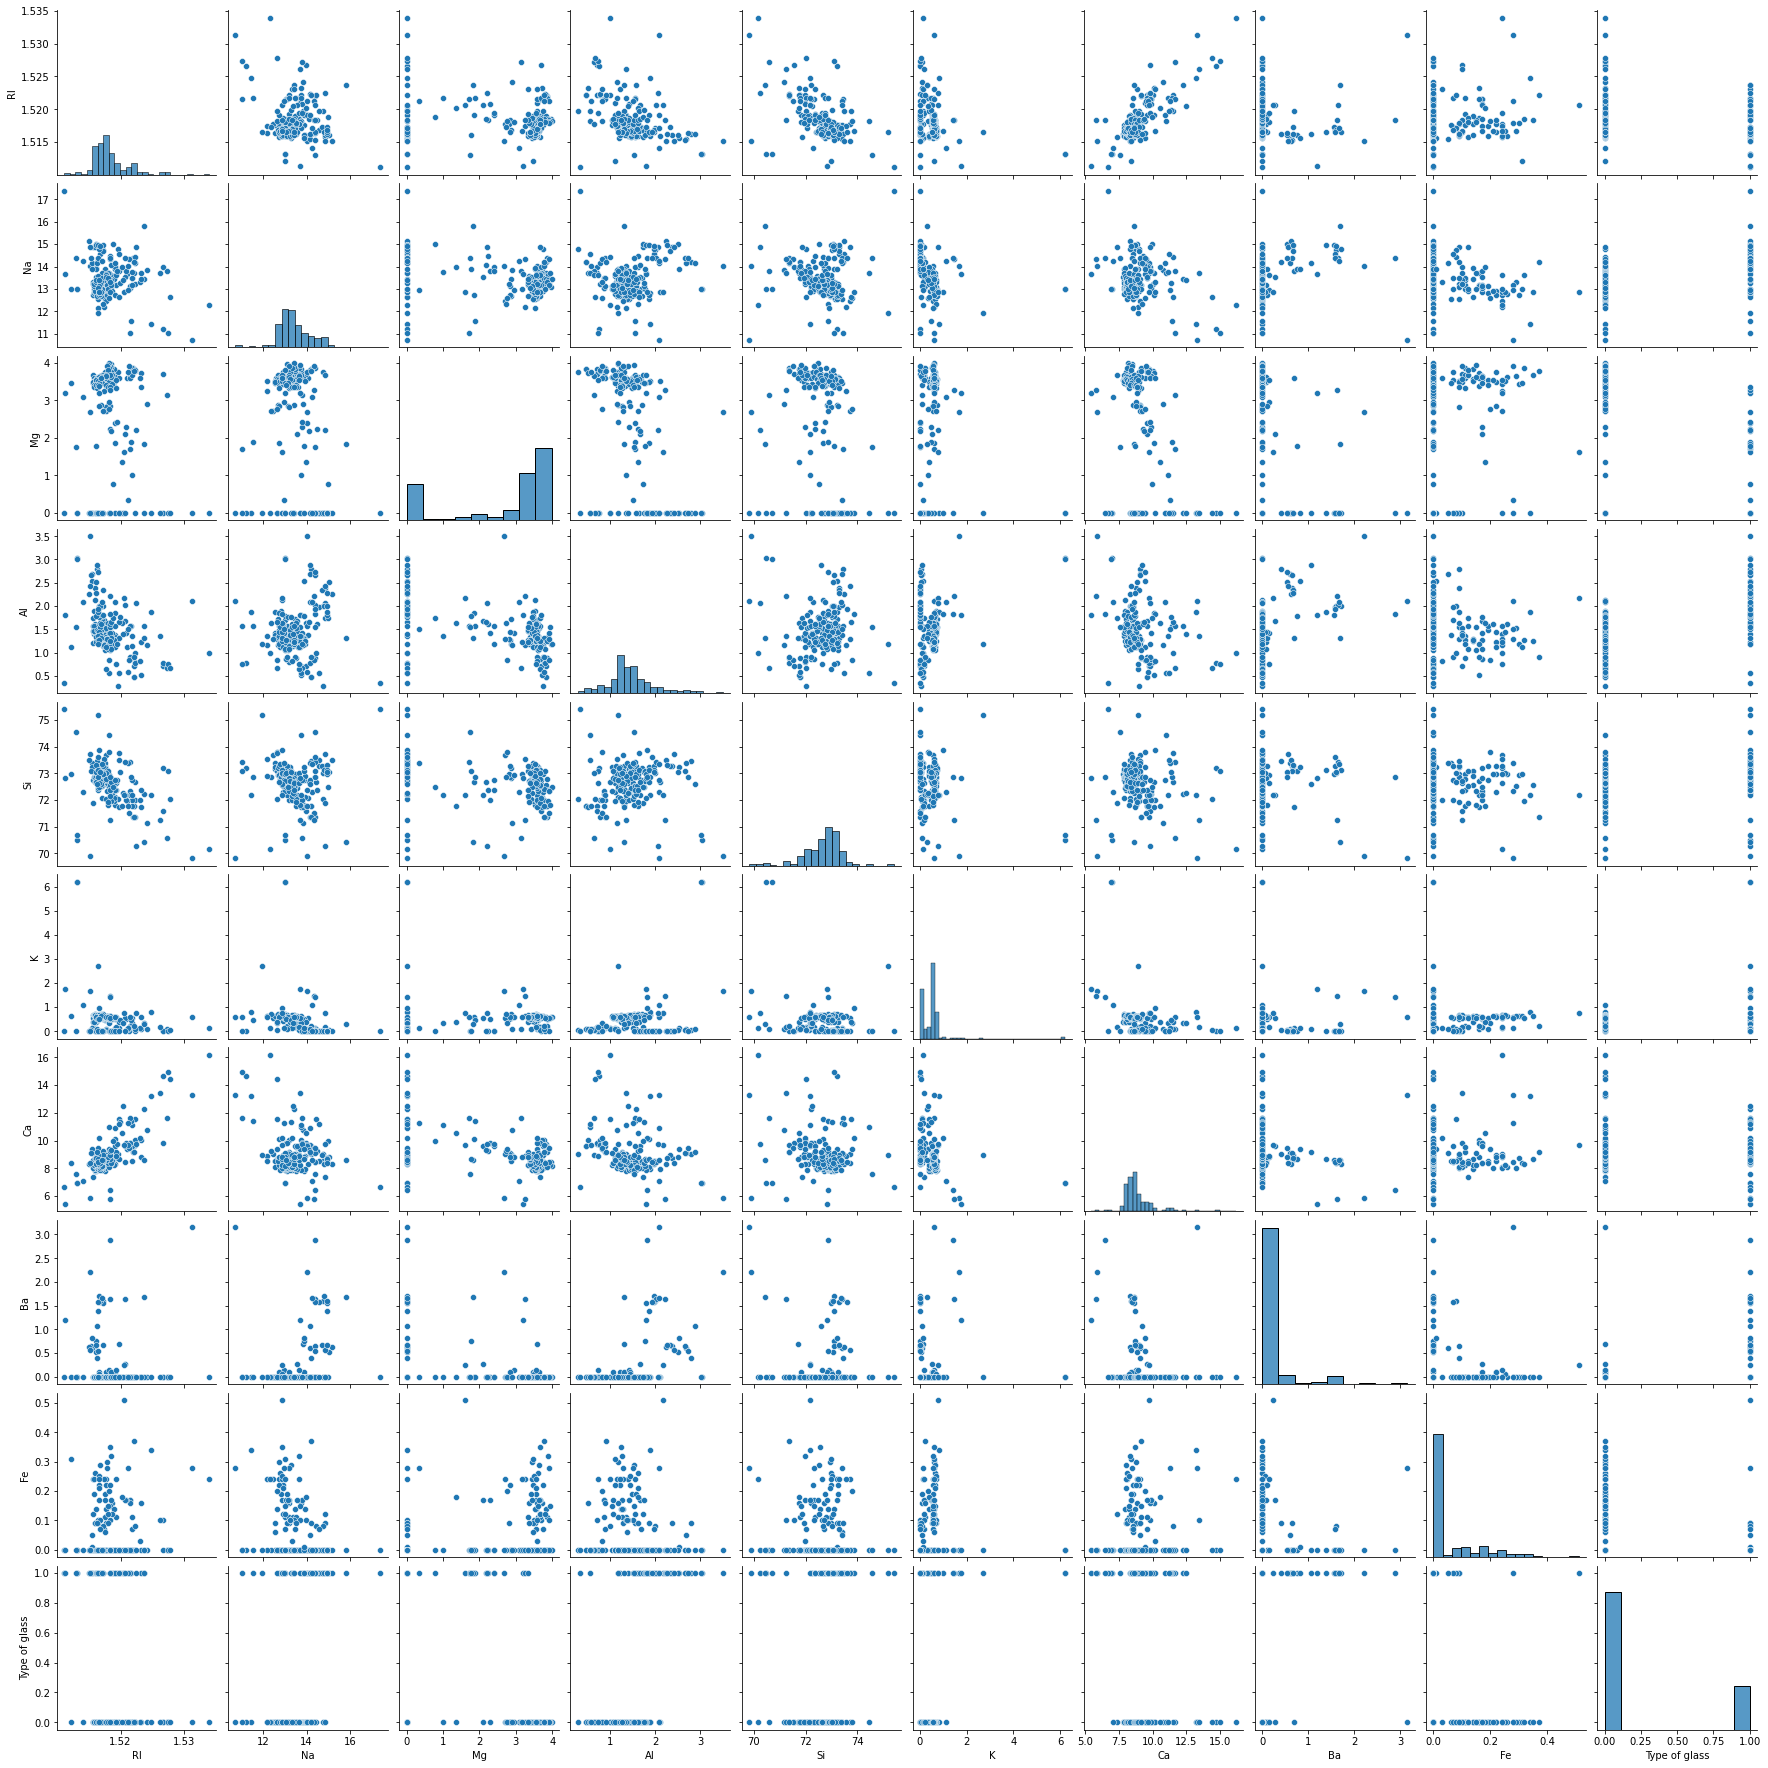

In [391]:
sns.pairplot(df)

# Detecting Outliers

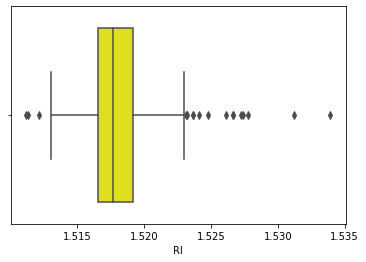

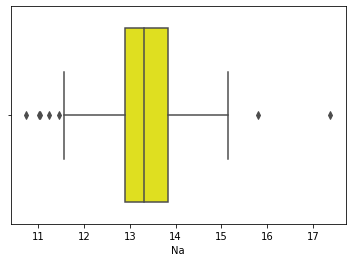

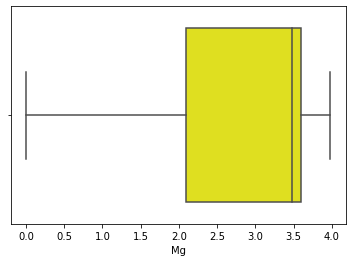

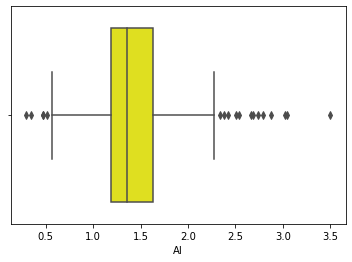

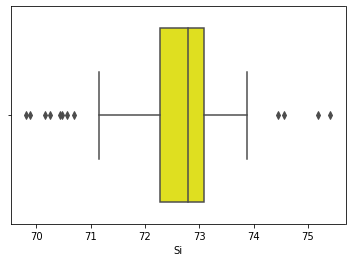

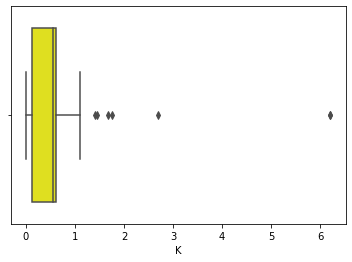

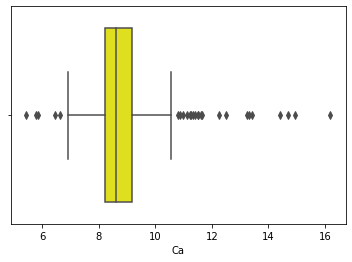

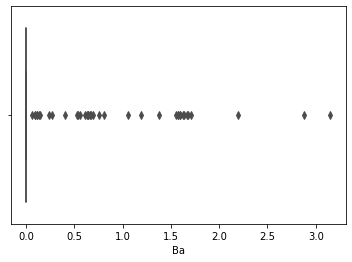

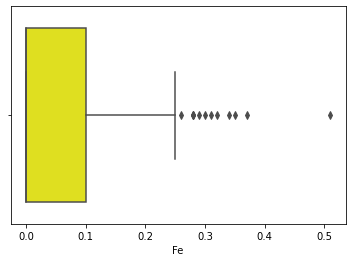

In [392]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],color='yellow')
    
for i in range(0,9):
    bxplt(i)

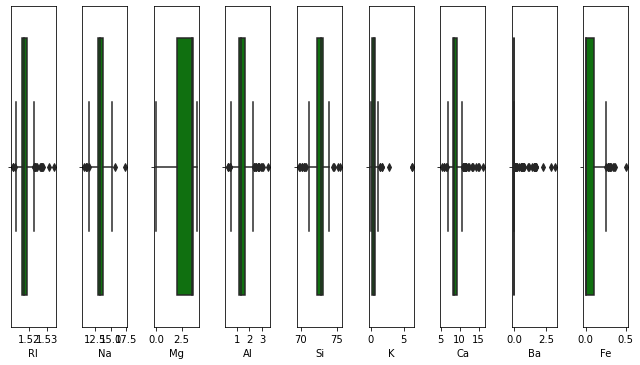

In [393]:
# to see outliers in a single visualization

plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)-1):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

we are able to observe outliers in all columns expect Mg

# Removing outliers

In [394]:
z=np.abs(zscore(df))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301,0.561084
1,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301,0.561084
2,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301,0.561084
3,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301,0.561084
4,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200,0.561084
...,...,...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301,1.782266
209,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301,1.782266
210,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301,1.782266
211,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301,1.782266


In [395]:
threshold=3
print(np.where(z>3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [396]:
df_new=df[(z<3).all(axis=1)]

In [397]:
df_new.shape

(193, 10)

In [398]:
df.shape

(213, 10)

In [399]:
percentage_of_outliers_removed=(( df.shape[0]-df_new.shape[0])/(df.shape[0]))*100
print(percentage_of_outliers_removed)

9.389671361502346


the data loss is less than 10% so we go ahead with the dataset

# lets visualize the data after outlier removal

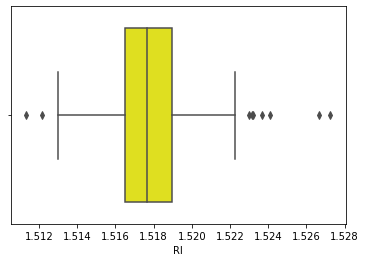

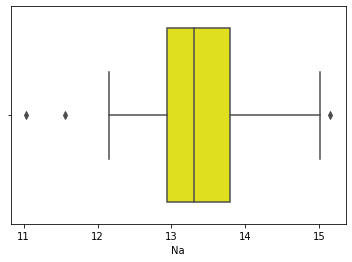

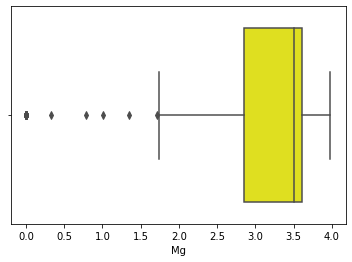

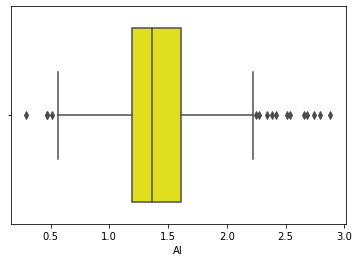

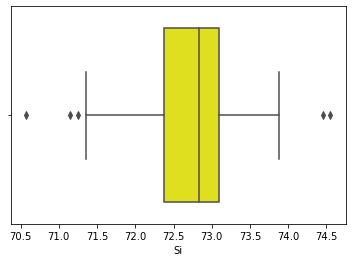

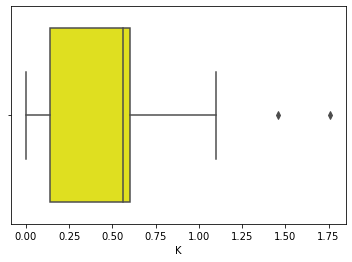

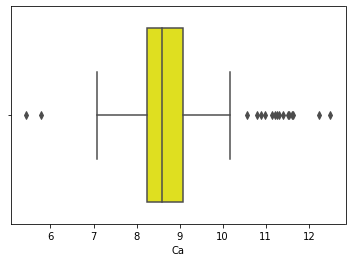

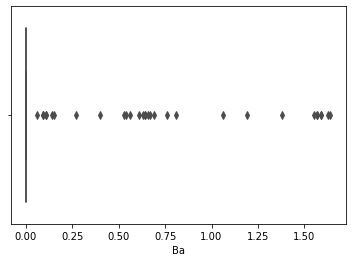

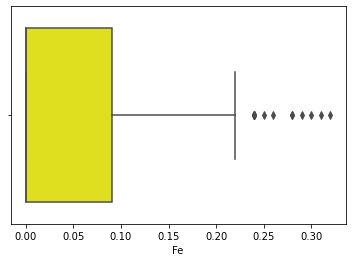

In [400]:
def boxplt(a):
    plt.figure()
    sns.boxplot(df_new[columns[a]],color='yellow')
    
for i in range(0,9):
    boxplt(i)

In [401]:
df=df_new

In [402]:
df.shape

(193, 10)

# check Skewness

In [450]:

X=df.drop(columns=["Type of glass"],axis=1)
y=df["Type of glass"]

In [451]:
X.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [452]:
X.skew().sort_values(ascending=False)

Ba    3.178256
Fe    1.478611
Ca    1.074092
RI    0.971729
Al    0.649917
Na    0.375857
K     0.297900
Si   -0.436288
Mg   -1.533664
dtype: float64

we need to remove the skewness in RI,Mg,K,Ca,Ba,Fe columns

In [453]:
from sklearn.preprocessing import power_transform

X_new=power_transform(X)
X_new

array([[ 0.00000000e+00,  7.33167092e-01,  6.06679218e-01, ...,
        -1.05441979e+00, -4.30745301e-01, -6.80130969e-01],
       [-1.04083409e-17,  2.16113315e-01,  5.24797917e-01, ...,
        -1.11687859e+00, -4.30745301e-01, -6.80130969e-01],
       [ 0.00000000e+00, -2.65548783e-01,  7.58484451e-01, ...,
        -5.86168077e-01, -4.30745301e-01, -6.80130969e-01],
       ...,
       [-6.93889390e-18,  2.08299719e+00, -1.95027080e+00, ...,
        -3.80713737e-01,  2.49256097e+00, -6.80130969e-01],
       [ 1.73472348e-17,  1.37163020e+00, -1.95027080e+00, ...,
        -3.35919945e-01,  2.49257769e+00, -6.80130969e-01],
       [-6.93889390e-18,  1.39793079e+00, -1.95027080e+00, ...,
        -2.91432352e-01,  2.49255313e+00, -6.80130969e-01]])

In [454]:
X=pd.DataFrame(X_new,columns=X.columns)


In [455]:
X.skew().sort_values(ascending=False)

Ba    1.963711
Fe    0.852040
Si    0.038832
K     0.016658
Al    0.014781
RI    0.000000
Na   -0.017389
Ca   -0.081151
Mg   -1.082875
dtype: float64

<AxesSubplot:xlabel='Mg', ylabel='Density'>

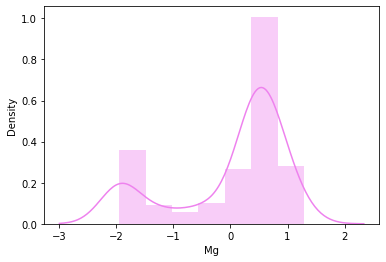

In [456]:

sns.distplot(X['Mg'],color='violet',bins=7)    


<AxesSubplot:xlabel='Ba', ylabel='Density'>

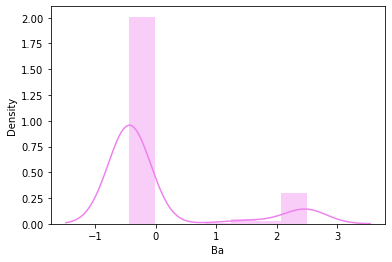

In [457]:
sns.distplot(X['Ba'],color='violet',bins=7)

<AxesSubplot:xlabel='Fe', ylabel='Density'>

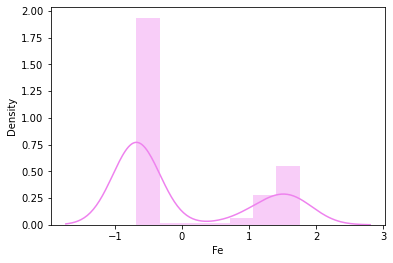

In [458]:
sns.distplot(X['Fe'],color='violet',bins=7)

In [459]:
X['Fe']=np.log(X['Fe'])
X['Ba']=np.log(X['Ba'])
X['Mg']=np.log(X['Mg'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

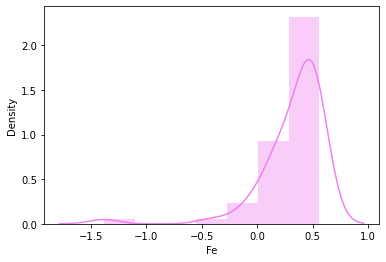

In [460]:
sns.distplot(X['Fe'],color='violet',bins=7)

<AxesSubplot:xlabel='Ba', ylabel='Density'>

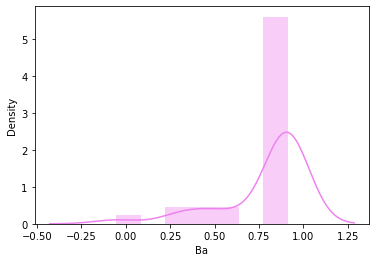

In [461]:
sns.distplot(X['Ba'],color='violet',bins=7)

<AxesSubplot:xlabel='Mg', ylabel='Density'>

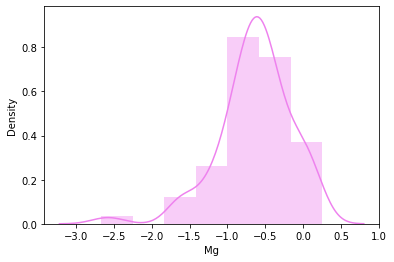

In [462]:

sns.distplot(X['Mg'],color='violet',bins=7)    

In [463]:
X.skew().sort_values(ascending=False)

Si    0.038832
K     0.016658
Al    0.014781
RI    0.000000
Na   -0.017389
Ca   -0.081151
Mg   -1.021342
Ba   -2.065858
Fe   -3.314201
dtype: float64

As we are unable to remove skewness we should drop Ba,Fe,Mg columns

In [464]:
X=pd.DataFrame(X,columns=X.columns)

In [465]:
X=X.drop(columns=['Ba','Fe','Mg'],axis=1)

In [466]:
X.columns

Index(['RI', 'Na', 'Al', 'Si', 'K', 'Ca'], dtype='object')

In [467]:
X.skew().sort_values(ascending=False)

Si    0.038832
K     0.016658
Al    0.014781
RI    0.000000
Na   -0.017389
Ca   -0.081151
dtype: float64

In [468]:
X

,RI,Na,Al,Si,K,Ca
0,0.000000e+00,0.733167,-0.077883,-0.045968,0.196528,-1.054420
1,-1.040834e-17,0.216113,0.328329,0.418555,-0.122754,-1.116879
2,0.000000e+00,-0.265549,-0.242339,-0.252940,0.509535,-0.586168
3,0.000000e+00,-0.173587,-0.362203,0.584619,0.440495,-0.762405
4,-1.040834e-17,-0.931755,0.501750,0.382025,0.748951,-0.762405
5,0.000000e+00,-0.127896,-0.608277,0.603241,0.543947,-0.644395
6,0.000000e+00,-0.358293,-0.837464,0.886728,0.509535,-0.563020
7,6.938894e-18,0.941280,-0.054699,-1.113830,0.475051,-0.494060
8,0.000000e+00,-0.593641,-0.077883,0.418555,0.509535,-0.380714
9,-1.387779e-17,-1.046767,0.372076,0.810365,0.850534,-0.738635


skewness in the dataset has been removed

In [469]:
y.shape

(193,)

In [470]:
#displating max_rows
pd.set_option('display.max_rows', None)

# Oversampling

In [471]:
#scaling the dataset 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [472]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()


In [473]:
X.shape

(193, 6)

In [474]:
temp=X.columns
temp

Index(['RI', 'Na', 'Al', 'Si', 'K', 'Ca'], dtype='object')

In [475]:
y.shape

(193,)

In [476]:
#Oversampling inreasing the minority data
X,y=SM.fit_resample(X_scaled,y)

In [477]:
y.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: Type of glass, dtype: float64

In [542]:
X.shape

(306, 6)

In [543]:
y.shape

(306,)

In [481]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [482]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif["features"]=temp
vif

,vif,features
0,4.083114,RI
1,2.880374,Na
2,1.582150,Al
3,2.214804,Si
4,3.600652,K
5,3.193609,Ca


since the vif is less than 10 it is allowable 

# Correlation Check

In [488]:
data=df.drop(columns=['Ba','Fe','Mg'],axis=1)

In [489]:
df_cor=data.corr()

<AxesSubplot:>

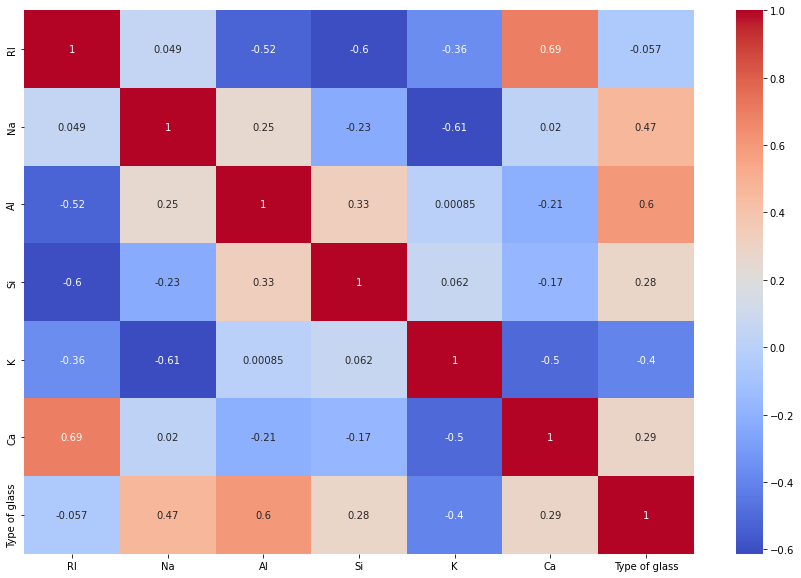

In [490]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,cmap='coolwarm',annot=True)

since the correlation is with in limits we can alow this

In [493]:
X=pd.DataFrame(X,columns=temp)

In [496]:
X.shape

(306, 6)

In [497]:
y.shape

(306,)

# Model Building

In [506]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    rf=RandomForestClassifier(n_estimators=100)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=f1_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  1.0  on random_state  8


In [507]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=8)

In [517]:
# different algorithm going to use

lg=LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier()
sv=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)
ada=AdaBoostClassifier(n_estimators=100)

In [511]:
#code for Training and Prediction 

def evaluate(x):
    model=x
    print(model)
    #training the model
    model.fit(x_train,y_train)
    #model prediction
    pred=model.predict(x_test)
    
    print("accuracy score is :",accuracy_score(y_test,pred)*100)
    print("F1 score is :",f1_score(y_test,pred)*100)
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

In [512]:
#calling function to run the model

In [513]:
#calling LogisticRegression model
evaluate(lg)

LogisticRegression()
accuracy score is : 96.7741935483871
F1 score is : 96.2962962962963


Confusion Matrix : 
 [[34  2]
 [ 0 26]]


Classification Report  : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.93      1.00      0.96        26

    accuracy                           0.97        62
   macro avg       0.96      0.97      0.97        62
weighted avg       0.97      0.97      0.97        62



In [514]:
#calling GaussianNB model
evaluate(gnb)

GaussianNB()
accuracy score is : 93.54838709677419
F1 score is : 92.0


Confusion Matrix : 
 [[35  1]
 [ 3 23]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.96      0.88      0.92        26

    accuracy                           0.94        62
   macro avg       0.94      0.93      0.93        62
weighted avg       0.94      0.94      0.94        62



In [515]:
#calling KNeighborsClassifier model
evaluate(knn)

KNeighborsClassifier()
accuracy score is : 90.32258064516128
F1 score is : 88.46153846153845


Confusion Matrix : 
 [[33  3]
 [ 3 23]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.88      0.88      0.88        26

    accuracy                           0.90        62
   macro avg       0.90      0.90      0.90        62
weighted avg       0.90      0.90      0.90        62



In [520]:
#calling DecisionTreeClassifier model
evaluate(dtc)

DecisionTreeClassifier()
accuracy score is : 95.16129032258065
F1 score is : 93.87755102040816


Confusion Matrix : 
 [[36  0]
 [ 3 23]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.88      0.94        26

    accuracy                           0.95        62
   macro avg       0.96      0.94      0.95        62
weighted avg       0.96      0.95      0.95        62



In [518]:
#calling SVC model
evaluate(sv)

SVC()
accuracy score is : 98.38709677419355
F1 score is : 98.11320754716981


Confusion Matrix : 
 [[35  1]
 [ 0 26]]


Classification Report  : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.96      1.00      0.98        26

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [519]:
#calling AdaBoostClassifier model
evaluate(ada)

AdaBoostClassifier(n_estimators=100)
accuracy score is : 98.38709677419355
F1 score is : 98.11320754716981


Confusion Matrix : 
 [[35  1]
 [ 0 26]]


Classification Report  : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.96      1.00      0.98        26

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [521]:
#calling RandomForestClassifier model
evaluate(rf)

RandomForestClassifier()
accuracy score is : 98.38709677419355
F1 score is : 98.0392156862745


Confusion Matrix : 
 [[36  0]
 [ 1 25]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.96      0.98        26

    accuracy                           0.98        62
   macro avg       0.99      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62



In [544]:
model=[lg,gnb,knn,sv,rf,dtc,ada]

for m in model:
    score=cross_val_score(m,X,y,cv=5)
    print(m,"Cross val score is ",score*100,"   ")
    print("mean is ",score.mean()*100,"\n\n")

LogisticRegression() Cross val score is  [91.93548387 96.72131148 93.44262295 86.8852459  95.08196721]    
mean is  92.81332628239026 


GaussianNB() Cross val score is  [88.70967742 98.36065574 95.08196721 91.80327869 96.72131148]    
mean is  94.13537810682179 


KNeighborsClassifier() Cross val score is  [93.5483871  98.36065574 96.72131148 93.44262295 91.80327869]    
mean is  94.77525118984664 


SVC() Cross val score is  [ 93.5483871  100.          96.72131148  91.80327869  95.08196721]    
mean is  95.43098889476468 


RandomForestClassifier() Cross val score is  [ 95.16129032 100.          96.72131148  95.08196721  96.72131148]    
mean is  96.737176097303 


DecisionTreeClassifier() Cross val score is  [ 91.93548387 100.          96.72131148  86.8852459   95.08196721]    
mean is  94.12480169222633 


AdaBoostClassifier(n_estimators=100) Cross val score is  [ 91.93548387 100.          95.08196721  95.08196721 100.        ]    
mean is  96.41988365943945 




By comparing both cross validation score and f1score. It is found that RandomForestClassifier is the best model with a difference of 0.2425

# Hyper parameter tuning

we will try to improve accuracy by hypertuning

In [550]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
criterion{“gini”, “entropy”, “log_loss”
splitter{“best”, “random”}
          min_samples_split
          min_samples_leaf
          max_features, float or {“auto”, “sqrt”, “log2”}

In [557]:
#parameters of randomforest classifier
grid_params1 = { 
    
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,20,3),
    'criterion' :['gini', 'entropy','log_loss'],
    'min_samples_leaf' :range(1,10,2),
    'min_samples_split' :range(2,10,2),
}

In [558]:
from sklearn.model_selection import GridSearchCV

grid_dtc= GridSearchCV(estimator=dtc,param_grid=grid_params1,cv= 5)

In [559]:
#training the model
grid_dtc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 20, 3),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ['best', 'random']})

In [561]:
best_parameters=grid_dtc.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [567]:
DTC=DecisionTreeClassifier(criterion='gini', max_depth=17,max_features='log2',min_samples_leaf=1,min_samples_split=2,
                       splitter='random')
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=17, max_features='log2', splitter='random')

In [568]:
DTC.score(x_train,y_train)


1.0

In [569]:
DTC.score(x_test,y_test)

0.9032258064516129

In [565]:
score=cross_val_score(DTC,X,y,cv=5)
print(DTC,"Cross val score is ",score)
print("mean is ",score.mean())

DecisionTreeClassifier(max_depth=17, max_features='log2', splitter='random') Cross val score is  [0.93548387 0.95081967 0.90163934 0.93442623 0.93442623]
mean is  0.9313590692755156


# since hyper tuning model is less and based on the problem statement we will go for least FP and FN

In [546]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
criterion{“gini”, “entropy”, “log_loss”}
max_featuresint, float or {“auto”, “sqrt”, “log2”}
“best”, “random”

In [547]:
#parameters of randomforest classifier
grid_params = { 
    
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,20,3),
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' :range(1,10,2),
    'min_samples_split' :range(2,10,2),
}

In [548]:
from sklearn.model_selection import GridSearchCV

grid_rf= GridSearchCV(estimator=rf,param_grid=grid_params,cv= 5)

In [549]:
#training the model
grid_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [200, 500]})

In [ ]:
#selecting the baset parameters

In [551]:
best_parameters=grid_rf.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [552]:
rfc=RandomForestClassifier(criterion= 'entropy', max_depth= 11, max_features='auto', min_samples_leaf=1, min_samples_split=4, n_estimators= 200)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_split=4, n_estimators=200)

# evaluate(DTC)

In [553]:
score=cross_val_score(rfc,X,y,cv=5)
print(rfc,"Cross val score is ",score)
print("mean is ",score.mean())

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_split=4, n_estimators=200) Cross val score is  [0.91935484 1.         0.96721311 0.95081967 0.96721311]
mean is  0.9609201480698044


In [554]:
rfc.score(x_train,y_train)

0.9959016393442623

In [555]:
rfc.score(x_test,y_test)

0.9838709677419355

# AUC_ROC CURVE

In [570]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve 

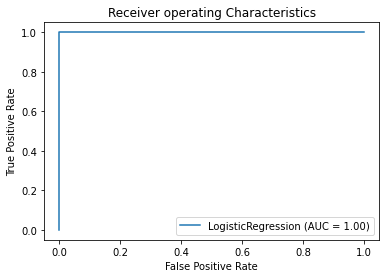

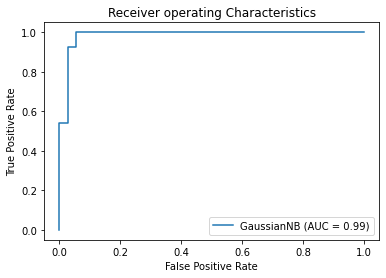

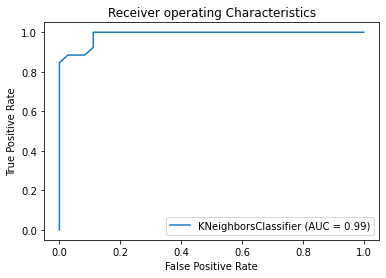

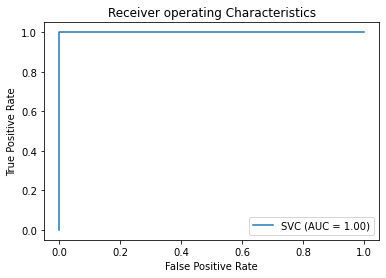

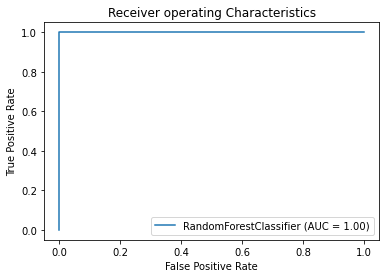

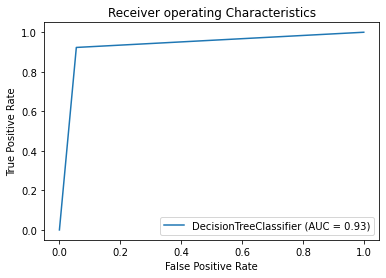

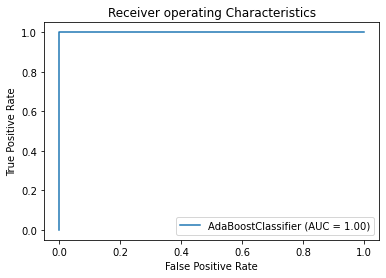

In [572]:
#lets see how well our model works on train data

model=[lg,gnb,knn,sv,rf,DTC,ada]
for m in model:
    ax=m.fit(x_train,y_train)
    plot_roc_curve(ax,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plt.show()

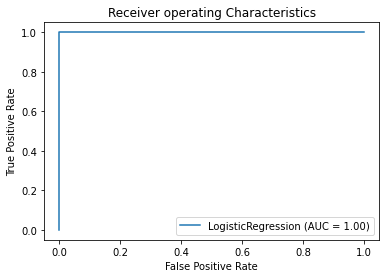

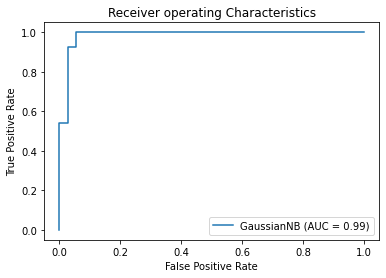

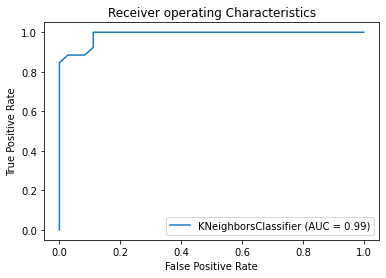

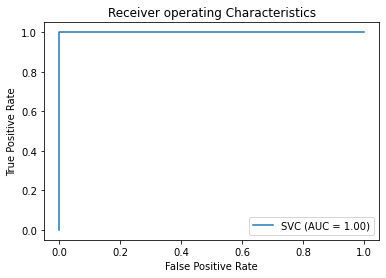

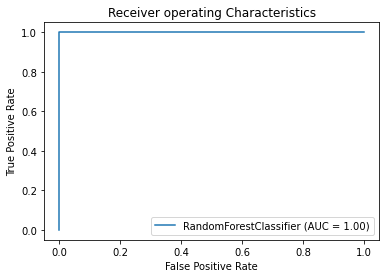

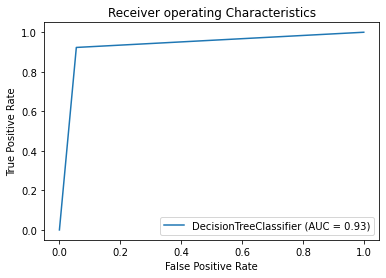

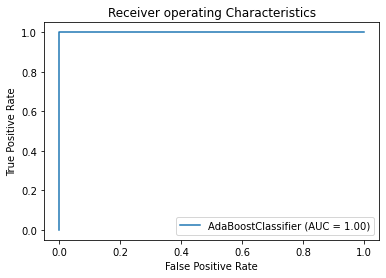

In [573]:
#lets see how well our model works on test data

model=[lg,gnb,knn,sv,rf,DTC,ada]
for m in model:
    plot_roc_curve(m,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

# Conclusion

In [575]:
joblib.dump(rfc,"Glass_Identification_Dataset.obj")

['Glass_Identification_Dataset.obj']

In [576]:
#Lets Check loading the file 

glass_prediction=joblib.load("Glass_Identification_Dataset.obj")

In [577]:
pred=rfc.predict(x_test)
Conclusion=pd.DataFrame([glass_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
Predicted,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,1,0,0,1
Original,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,1,0,0,1


# Model Created Succesfully